# Red Neuronal con TensorFLow y Keras

Importamos las librerias necesarias

In [81]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numba 
from numba import cuda
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [3]:
print('Número de GPUs disponibles:' , len(tf.config.list_physical_devices('GPU')))

Número de GPUs disponibles: 1


Importo el Dataframe de train ajustado 

In [2]:
df = pd.read_csv("df_train2.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'Long_duration', 'Department_TB & Chest disease',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'gender_Female',
       'gender_Male', 'gender_Other', 'Type of Admission_Emergency',
       'Type of Admission_Trauma', 'Type of Admission_Urgent',
       'health_conditions_Asthama', 'health_conditions_Diabetes',
       'health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le',
       'Severity'],
      dtype='object')

In [4]:
df.shape

(410000, 23)

In [5]:
df.head()

,Unnamed: 0,Long_duration,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,gender_Female,gender_Male,gender_Other,...,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_No,Insurance_Yes,Age_le,Severity
0,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,4,2
1,1,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,3,0
2,2,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,2,2
3,3,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,3,1
4,4,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,7,1


In [6]:
df['Long_duration']

0         0
1         1
2         0
3         0
4         1
         ..
409995    0
409996    1
409997    1
409998    1
409999    0
Name: Long_duration, Length: 410000, dtype: int64

Separo en df_entrada solo las columnas que voy a utilizar para entrenar la red neuronal. EN EL DATAFRAME COMPLETO

In [13]:
df_entrada = df[['Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female',
                'gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes',
                'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity'  ]]

In [8]:
df_salida = df['Long_duration']

Escojo una muestra aleatoria del total de los datos y le elimino la columna 'Long_duration' en donde se encuentra el dato que quiero predecir

In [16]:
df_Sample = df.sample(n = 2000)

In [17]:
df_SampleEntrada = df_Sample[['Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female',
                'gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes',
                'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity'  ]]

In [18]:
df_SampleEntrada.shape

(2000, 21)

In [19]:
df_SampleSalida = df_Sample['Long_duration']

In [20]:
df_Sample.shape

(2000, 23)

In [21]:
df_SampleEntrada.shape

(2000, 21)

In [22]:
df_SampleSalida.shape

(2000,)

## Red neuronal 1
Tiene 15 capas ocultas y se entreno con OneHotEncoder de las columnas 'Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female','gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes', 'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity'

Creamos la red neuronal y entrenamos la red neuronal

In [23]:
oculta1 = tf.keras.layers.Dense(units = 22 , input_shape=(21,))
oculta2 = tf.keras.layers.Dense(units = 21)
oculta3 = tf.keras.layers.Dense(units = 25)
oculta4 = tf.keras.layers.Dense(units = 19)
oculta5 = tf.keras.layers.Dense(units = 18)
oculta6 = tf.keras.layers.Dense(units = 17)
oculta7 = tf.keras.layers.Dense(units = 16)
oculta8 = tf.keras.layers.Dense(units = 15)
oculta9 = tf.keras.layers.Dense(units = 14)
oculta10 = tf.keras.layers.Dense(units = 10)
oculta11 = tf.keras.layers.Dense(units = 9)
oculta12 = tf.keras.layers.Dense(units = 8)
oculta13 = tf.keras.layers.Dense(units = 7)
oculta14 = tf.keras.layers.Dense(units = 6)
oculta15 = tf.keras.layers.Dense(units = 5)
 #, oculta3,oculta4,oculta5,oculta6,oculta7,oculta8, oculta9, oculta10, oculta11, oculta12, oculta13, oculta14, oculta15, salida])
salida = tf.keras.layers.Dense(units = 1)
modelo =tf.keras.Sequential([oculta1,oculta2, oculta3,oculta4,oculta5,oculta6,oculta7,oculta8, oculta9, oculta10, oculta11, oculta12, oculta13, oculta14, oculta15, salida])

In [ ]:
oculta3 = tf.keras.layers.Dense(units = 20)
oculta4 = tf.keras.layers.Dense(units = 19)
oculta5 = tf.keras.layers.Dense(units = 18)
oculta6 = tf.keras.layers.Dense(units = 17)
oculta7 = tf.keras.layers.Dense(units = 16)
oculta8 = tf.keras.layers.Dense(units = 15)
oculta9 = tf.keras.layers.Dense(units = 14)
oculta10 = tf.keras.layers.Dense(units = 10)
oculta11 = tf.keras.layers.Dense(units = 9)
oculta12 = tf.keras.layers.Dense(units = 8)
oculta13 = tf.keras.layers.Dense(units = 7)
oculta14 = tf.keras.layers.Dense(units = 6)
oculta15 = tf.keras.layers.Dense(units = 5)

modelo =tf.keras.Sequential([oculta1,oculta2, oculta3,oculta4,oculta5,oculta6,oculta7,oculta8, oculta9, oculta10, oculta11, oculta12, oculta13, oculta14, oculta15, salida])

In [24]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.00001),
    loss = 'mean_squared_error'
)

In [25]:
print('Comenzando el entrenamiento')
historial = modelo.fit(df_SampleEntrada.values, df_SampleSalida.values.reshape(-1,1), epochs= 500, verbose=True)
print('Listo')

Comenzando el entrenamiento
Epoch 1/500
63/63 [==============================] - 3s 5ms/step - loss: 0.1667
Epoch 2/500
63/63 [==============================] - 0s 4ms/step - loss: 0.1325
Epoch 3/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1166
Epoch 4/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1105
Epoch 5/500
63/63 [==============================] - 0s 4ms/step - loss: 0.1084
Epoch 6/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1075
Epoch 7/500
63/63 [==============================] - 0s 4ms/step - loss: 0.1069
Epoch 8/500
63/63 [==============================] - 0s 4ms/step - loss: 0.1066
Epoch 9/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1062
Epoch 10/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1059
Epoch 11/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1056
Epoch 12/500
63/63 [==============================] - 0s 4ms/step - loss: 0.1052
Epoch 13/

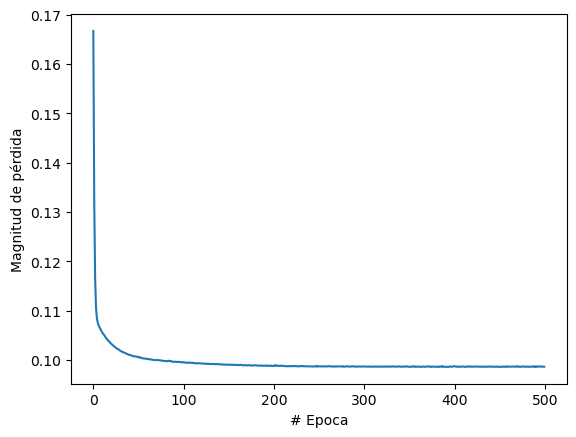

In [26]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])


In [ ]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(oculta3.get_weights())
print(oculta4.get_weights())
print(salida.get_weights())

In [ ]:
!Nvidia -msi

In [58]:
import numpy as np

Seleccionamos los datos de DF con lo que vamos a hacer la predicción y la respuesta de estos para probar el modelo posteriormente

In [27]:
df_prediccion = df.sample(n = 90000)

In [28]:
df_prediccion_ENTRADA = df_prediccion[['Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female',
                'gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes',
                'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity'  ]]

In [29]:
df_prediccion_ENTRADA.head()

,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,gender_Female,gender_Male,gender_Other,Type of Admission_Emergency,Type of Admission_Trauma,...,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_No,Insurance_Yes,Age_le,Severity
292091,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,2,0
34909,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,3,0
220842,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,4,0
276380,0,0,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,1,2,1
279102,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,5,1


In [35]:
df_prediccion_CORRECTAS = df_prediccion['Long_duration']

Hacemos prediciones con la red neuronal entrenada

In [39]:
df_test1 = pd.read_csv("df_test.csv") #importo el csv de los datos de test

In [27]:
df_train = df_train[['Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'gender_Female', 'gender_Male', 'gender_Other',
       'Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'health_conditions_Asthama',
       'health_conditions_Diabetes', 'health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le',
       'Severity']]

In [62]:
df_prediccion = df_train.copy()

NameError: name 'df_train' is not defined

In [31]:
print("Predición de unos datos")
resultado = modelo.predict(df_prediccion_ENTRADA.values)
print("Resuelto")

Predición de unos datos
Resuelto


In [32]:
resultado = np.round(resultado, decimals=0)

In [33]:
resultado

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [34]:
roc_auc_score(y_true= df_prediccion_CORRECTAS, y_score= resultado)

0.6030081957297834

In [40]:
print(classification_report(df_prediccion_CORRECTAS, resultado))

              precision    recall  f1-score   support

           0       0.49      0.58      0.53     34012
           1       0.71      0.63      0.67     55988

    accuracy                           0.61     90000
   macro avg       0.60      0.60      0.60     90000
weighted avg       0.63      0.61      0.61     90000



In [31]:
respuesta = pd.DataFrame(resultado, columns=['pred'])
respuesta.head()

,pred
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [32]:
respuesta['pred'] = respuesta['pred'].astype(int)

In [33]:
respuesta.head()

,pred
0,1
1,1
2,1
3,1
4,1


In [28]:
#respuesta.to_csv('alkymvaletta.csv', index=False)

Vemos los resultados

In [38]:
print(classification_report(df_prediccion_CORRECTAS, resultado))

              precision    recall  f1-score   support

           0       0.49      0.58      0.53     34012
           1       0.71      0.63      0.67     55988

    accuracy                           0.61     90000
   macro avg       0.60      0.60      0.60     90000
weighted avg       0.63      0.61      0.61     90000



## Red neuronal 2
Se entrenó con LabelEncoder de las columnas 'Available Extra Rooms in Hospital', 'Department', 'doctor_name', 'staff_available', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance', 'Age_le'

In [84]:
df_LE = pd.read_csv("dfLabelEncoder.csv")

In [85]:
df_LE_muestra = df_LE.sample(n= 10000)

In [86]:
df_LE_muestra.shape

(10000, 12)

copio para que no se pierda y probar editando las columnas de entrada con todas estas recall de .84
df_LE_muestra_Entrada = df_LE_muestra[['Available Extra Rooms in Hospital', 'Department', 'doctor_name', 'staff_available', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance', 'Age_le']]

In [87]:
df_LE_muestra_Entrada = df_LE_muestra[['Department', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance', 'Age_le']]

In [88]:
df_LE_muestra_Entrada.head()

,Department,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Age_le
96619,2,0,0,2,4,1,2
322805,0,1,1,0,0,1,6
114420,2,0,2,2,1,1,3
185481,2,0,1,2,3,1,3
257484,2,0,1,2,3,1,1


In [89]:
df_LE_muestra_Salida = df_LE_muestra['Long_duration']

In [90]:
oculta1 = tf.keras.layers.Dense(units = 20 , input_shape=(7,))
oculta2 = tf.keras.layers.Dense(units = 19)
oculta3 = tf.keras.layers.Dense(units = 18)
oculta4 = tf.keras.layers.Dense(units = 17)
oculta5 = tf.keras.layers.Dense(units = 16)
# oculta6 = tf.keras.layers.Dense(units = 17)
# oculta7 = tf.keras.layers.Dense(units = 16)
# oculta8 = tf.keras.layers.Dense(units = 15)
# oculta9 = tf.keras.layers.Dense(units = 14)
# oculta10 = tf.keras.layers.Dense(units = 10)
# oculta11 = tf.keras.layers.Dense(units = 9)
# oculta12 = tf.keras.layers.Dense(units = 8)
# oculta13 = tf.keras.layers.Dense(units = 7)
# oculta14 = tf.keras.layers.Dense(units = 6)
# oculta15 = tf.keras.layers.Dense(units = 5)
#, oculta3,oculta4,oculta5,oculta6,oculta7,oculta8, oculta9, oculta10, oculta11, oculta12, oculta13, oculta14, oculta15, salida])
salida = tf.keras.layers.Dense(units = 1)
modelo =tf.keras.Sequential([oculta1,oculta2, oculta3,oculta4,oculta5, salida])

In [91]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.00001),
    loss = 'mean_squared_error'
)

In [92]:
print('Comenzando el entrenamiento')
historial = modelo.fit(df_LE_muestra_Entrada.values, df_LE_muestra_Salida.values.reshape(-1,1), epochs= 500, verbose=True)
print('Listo')

Comenzando el entrenamiento
Epoch 1/500
313/313 [==============================] - 1s 2ms/step - loss: 7.4112e-08
Epoch 2/500
313/313 [==============================] - 1s 2ms/step - loss: 7.4112e-08
Epoch 3/500
313/313 [==============================] - 1s 2ms/step - loss: 7.4112e-08
Epoch 4/500
313/313 [==============================] - 1s 2ms/step - loss: 7.4112e-08
Epoch 5/500
313/313 [==============================] - 1s 2ms/step - loss: 7.4112e-08
Epoch 6/500
313/313 [==============================] - 1s 2ms/step - loss: 7.4112e-08
Epoch 7/500
313/313 [==============================] - 1s 2ms/step - loss: 7.4112e-08
Epoch 8/500
313/313 [==============================] - 1s 2ms/step - loss: 7.4112e-08
Epoch 9/500
313/313 [==============================] - 1s 2ms/step - loss: 7.4112e-08
Epoch 10/500
313/313 [==============================] - 1s 2ms/step - loss: 7.4112e-08
Epoch 11/500
313/313 [==============================] - 1s 2ms/step - loss: 7.4112e-08
Epoch 12/500
313/313 [==

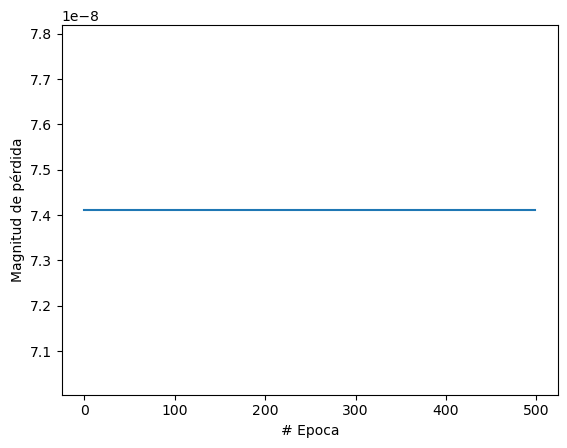

In [93]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])

Hacemos prediciones con la red neuronal entrenada

In [94]:
df_LE_prueba = df_LE.sample(n=90000)
df_LE_prueba_Entrada = df_LE_prueba[['Department', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance', 'Age_le']]
df_LE_prueba_CORRECTA = df_LE_prueba['Long_duration']

In [95]:
df_LE_prueba_Entrada.shape

(90000, 7)

In [96]:
correcta = df_LE_prueba_CORRECTA.values.reshape(-1,1)

In [97]:
print("Predición de unos datos")
resultado = modelo.predict(df_LE_prueba_Entrada.values)
print("Resuelto")

Predición de unos datos
Resuelto


In [98]:
resultado = np.round(resultado, decimals=0)

In [99]:
resultado.shape

(90000, 1)

In [100]:
print(classification_report(correcta, resultado))

              precision    recall  f1-score   support

        -4.0       0.00      0.00      0.00         0
        -3.0       0.00      0.00      0.00         0
        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.18      0.03      0.06     33653
         1.0       0.58      0.21      0.30     56347
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0

    accuracy                           0.14     90000
   macro avg       0.06      0.02      0.03     90000
weighted avg       0.43      0.14      0.21     90000



c:\Users\alkymvaletta\anaconda3\envs\tfk\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alkymvaletta\anaconda3\envs\tfk\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alkymvaletta\anaconda3\envs\tfk\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
roc_auc_score(y_true=correcta, y_score=resultado)

0.4220591711846465

Hacemos ajuste de los datos para generar la predicción tomando con la nueva Red Neuronal

In [117]:
df_test_LE = pd.read_csv('dfTEST_LabelEncoder.csv')
df_test_LE.shape

(90000, 10)

In [118]:
df_test_LE = df_test_LE[['Department', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance', 'Age_le']]
df_test_LE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Department           90000 non-null  int64
 1   gender               90000 non-null  int64
 2   Type of Admission    90000 non-null  int64
 3   Severity of Illness  90000 non-null  int64
 4   health_conditions    90000 non-null  int64
 5   Insurance            90000 non-null  int64
 6   Age_le               90000 non-null  int64
dtypes: int64(7)
memory usage: 4.8 MB


In [119]:
print("Predición de unos datos")
resultado = modelo.predict(df_test_LE.values)
print("Resuelto")

Predición de unos datos
Resuelto


In [120]:
resultado = np.round(resultado, decimals=0)

In [121]:
respuesta = pd.DataFrame(resultado, columns=['pred'])
respuesta.head()

,pred
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [122]:
respuesta.value_counts()

pred
1.0     76015
0.0     13985
dtype: int64

In [ ]:
respuesta['pred'] = respuesta['pred'].astype(int)
respuesta.to_csv('alkymvaletta.csv', index=False)

## Red neuronal 3
Se entrenó con OneHotEcoder en las columnas Department_TB & Chest disease', 'Department_anesthesia', 'Department_gynecology', 'Department_radiotherapy', 'Department_surgery', 'gender_Female', 'gender_Male', 'gender_Other', 'Type of Admission_Emergency', 'Type of Admission_Trauma', 'Type of Admission_Urgent', 'health_conditions_Asthama', 'health_conditions_Diabetes', 'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None', 'health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le', 'Severity' (las mismas de la Red Neuronal 1).

En esta ocasión, cambiaremos el parámetro loss por 'mean_squared_logarithmic_error', teniendo en cuenta que la Red Neuronal 1 fue la que obtuvo el mejor ROC_AUC_SCORE de las dos anteriores

In [138]:
oculta1 = tf.keras.layers.Dense(units = 22 , input_shape=(21,))
oculta2 = tf.keras.layers.Dense(units = 21)
oculta3 = tf.keras.layers.Dense(units = 25)
oculta4 = tf.keras.layers.Dense(units = 19)
oculta5 = tf.keras.layers.Dense(units = 18)
oculta6 = tf.keras.layers.Dense(units = 17)
oculta7 = tf.keras.layers.Dense(units = 16)
oculta8 = tf.keras.layers.Dense(units = 15)
oculta9 = tf.keras.layers.Dense(units = 14)
oculta10 = tf.keras.layers.Dense(units = 10)
oculta11 = tf.keras.layers.Dense(units = 9)
oculta12 = tf.keras.layers.Dense(units = 8)
oculta13 = tf.keras.layers.Dense(units = 7)
oculta14 = tf.keras.layers.Dense(units = 6)
oculta15 = tf.keras.layers.Dense(units = 5)
 #, oculta3,oculta4,oculta5,oculta6,oculta7,oculta8, oculta9, oculta10, oculta11, oculta12, oculta13, oculta14, oculta15, salida])
salida = tf.keras.layers.Dense(units = 1)
modelo =tf.keras.Sequential([oculta1,oculta2, oculta3,oculta4,oculta5,oculta6,oculta7,oculta8, oculta9, oculta10, oculta11, oculta12, oculta13, oculta14, oculta15, salida])

In [139]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.00001),
    loss = 'mean_squared_logarithmic_error'
)

In [140]:
print('Comenzando el entrenamiento')
historial = modelo.fit(df_SampleEntrada.values, df_SampleSalida.values.reshape(-1,1), epochs= 500, verbose=True)
print('Listo')

Comenzando el entrenamiento
Epoch 1/500
63/63 [==============================] - 1s 5ms/step - loss: 0.5810
Epoch 2/500
63/63 [==============================] - 0s 3ms/step - loss: 0.4257
Epoch 3/500
63/63 [==============================] - 0s 3ms/step - loss: 0.3140
Epoch 4/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2369
Epoch 5/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1874
Epoch 6/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1585
Epoch 7/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1422
Epoch 8/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1338
Epoch 9/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1293
Epoch 10/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1263
Epoch 11/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1240
Epoch 12/500
63/63 [==============================] - 0s 3ms/step - loss: 0.1221
Epoch 13/

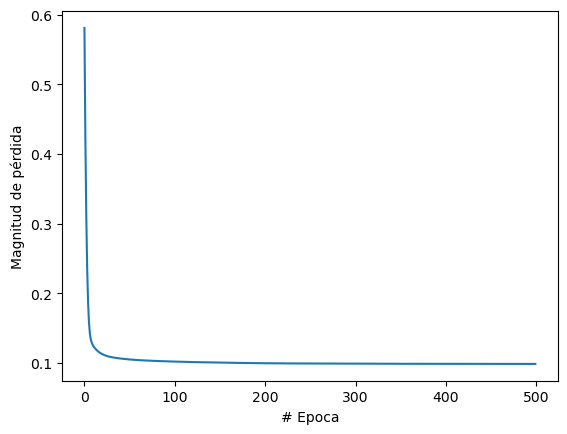

In [141]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])

In [142]:
df_prediccion = df.sample(n = 90000)

In [143]:
df_prediccion_ENTRADA = df_prediccion[['Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female',
                'gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes',
                'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity'  ]]

In [144]:
df_prediccion_CORRECTAS = df_prediccion['Long_duration']

In [145]:
print("Predición de unos datos")
resultado = modelo.predict(df_prediccion_ENTRADA.values)
print("Resuelto")

Predición de unos datos
Resuelto


In [146]:
resultado = np.round(resultado, decimals=0)

In [147]:
roc_auc_score(y_true= df_prediccion_CORRECTAS, y_score= resultado)


0.5994627301345221

In [149]:
print(classification_report(df_prediccion_CORRECTAS, resultado))

              precision    recall  f1-score   support

           0       0.48      0.57      0.52     33953
           1       0.71      0.63      0.67     56047

    accuracy                           0.61     90000
   macro avg       0.59      0.60      0.59     90000
weighted avg       0.62      0.61      0.61     90000



Ahora hacemos las prediciones con el df de test

In [150]:
df_test_RN3 = pd.read_csv("df_test.csv")

In [152]:
df_test_RN3 = df_test_RN3[['Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology','Department_radiotherapy', 'Department_surgery', 'gender_Female',
                'gender_Male', 'gender_Other', 'Type of Admission_Emergency','Type of Admission_Trauma', 'Type of Admission_Urgent','health_conditions_Asthama', 'health_conditions_Diabetes',
                'health_conditions_Heart disease', 'health_conditions_High Blood Pressure', 'health_conditions_None','health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le','Severity'  ]]

In [157]:
print("Predición de unos datos")
resultadoRN3 = modelo.predict(df_test_RN3.values)
print("Resuelto")

Predición de unos datos
Resuelto


In [158]:
resultadoRN3 = np.round(resultado, decimals=0)

In [159]:
respuestaRN3 = pd.DataFrame(resultado, columns=['pred'])


In [162]:
respuesta['pred'] = respuesta['pred'].astype(int)
respuesta.to_csv('alkymvaletta3.csv', index=False)